<a href="https://colab.research.google.com/github/odevhesabi1/Odevler/blob/main/%C3%96dev%20-%20Lineer%20Regresyon%20ile%20Tahmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

house_prices_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")
house_prices_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [40]:
##Verilerinizi eğitim ve test kümelerine ayırın.####

#Bu verisetinde gerekli temizliği yapamadığım için, en azından ödevi tamamlamak adına rastgele uygun gördüğüm birkaç özellik ile
#modeli inşaa etmeye çalışacağım.
from sklearn.model_selection import train_test_split

df = house_prices_df[["LotArea", "YearBuilt", "1stFlrSF",  "GarageArea", "GrLivArea", "SalePrice"]]
X = house_prices_df[["LotArea", "YearBuilt", "1stFlrSF",  "GarageArea", "GrLivArea"]]
Y = house_prices_df[["SalePrice"]]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 1168
Test kümesindeki gözlem sayısı   : 292


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   LotArea     1460 non-null   int64
 1   YearBuilt   1460 non-null   int64
 2   1stFlrSF    1460 non-null   int64
 3   GarageArea  1460 non-null   int64
 4   GrLivArea   1460 non-null   int64
 5   SalePrice   1460 non-null   int64
dtypes: int64(6)
memory usage: 68.6 KB


In [32]:
### Modelinizi eğitim kümesinden önceki derste olduğu gibi oluşturun. Modelinizin uygunluğunu değerlendirin. ###

X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     556.4
Date:                Sat, 22 May 2021   Prob (F-statistic):          2.73e-305
Time:                        23:44:35   Log-Likelihood:                -14099.
No. Observations:                1168   AIC:                         2.821e+04
Df Residuals:                    1162   BIC:                         2.824e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.536e+06   9.14e+04    -16.792      0.000   -1.71e+06   -1.36e+06
LotArea        0.4479      0.123      3.652      0.000       0.207       0.689
YearBuilt    782.8555     47.125     16.612      0.000     690.395     875.316
1stFlrSF      23.9579      4.202      5.702      0.000      15.714      32.202
GarageArea    70.2508      7.567      9.283      0.000      55.403      85.098
GrLivArea     70.2798      2.982     23.567      0.000      64.429      76.131
==============================================================================
Omnibus:                      433.073   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33659.918
Skew:                          -0.794   Prob(JB):                         0.00
Kurtosis:                      29.251   Cond. No.                     1.12e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

P testi tüm özellikler için 0 ve istatistiksel olarak anlamlı.
Katsayılara baktığımda YearBuilt özelliğinin en yüksek değere sahip oldugunu görüyoruz. 

Modelde, varyansı en çok açıklayan, en çok bilgiyi taşıyan özelliğimiz bu demektir. ( Ayrıca bu özelliğin standart sapması çok yüksek, bu yüzden mi en çok bilgiyi bu taşıyor ? )

LotArea'nın katsayısı oldukça düşük , belki verisetinden bile çıkarılabilir mi. Bu doğru bir yorum olur mu ? 

R ve adj R değerleri yüksek duruyor. Ama yinede şu değerlerin üstünde olsun diyeceğimiz bir eşik değeri var mıdır genel olarak bu parametreleri değerlendirirken ?

F statistic ve BIC değerleri bireysel olarak yorumlanamaz. Başka bir modelin F ve BIC değerleri ile karşılaştırma yapılabilir ancak.

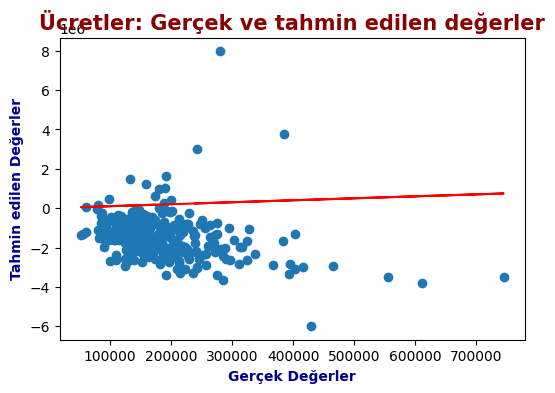

Ortalama Mutlak Hata (MAE)        : 1718616.986023154
Ortalama Kare Hata (MSE)          : [7.74156941e+12 1.72771435e+10 5.99256253e+12 1.55651918e+12
 3.46038504e+11 3.70405097e+12 2.05809840e+12 2.81683941e+12
 3.66651023e+12 7.89040038e+12 4.37792964e+11 4.86650520e+12
 4.40549520e+12 2.70935142e+11 1.08878991e+12 2.68582462e+12
 2.06348282e+11 4.97661025e+12 3.12188168e+12 7.67687388e+12
 1.60163862e+13 3.65254395e+12 7.56707024e+11 1.46302177e+13
 1.35509534e+13 3.55675281e+11 5.69749405e+11 4.22060377e+12
 6.87259077e+12 1.33858032e+13 1.34919698e+12 5.10106051e+12
 4.41220269e+12 1.28515459e+13 1.04932274e+12 9.42929463e+12
 1.65318718e+12 3.09490670e+12 6.54153425e+10 1.73153424e+11
 1.81610714e+12 5.58882896e+12 3.41735306e+12 3.68107817e+12
 2.61653517e+12 1.29952759e+12 6.47483560e+12 5.25684809e+12
 7.73471057e+12 2.12826217e+12 1.72074471e+12 4.70124134e+12
 9.22523404e+12 2.35733901e+12 1.07241466e+12 5.84410405e+12
 1.09561466e+12 9.97661373e+12 2.01679112e+11 6.27436050

In [44]:
## Test kümesindeki ev fiyatlarını tahmin edin ve bu derste belirttiğimiz metrikleri kullanarak modelinizin performansını değerlendirin. ##
## Modelinizin performansı tatmin edici mi? Açıklayın.


X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Ücretler: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

MSE ve RMSE'yi neden matris şeklinde verdi anlamadım. Verilerin hepsi int64 ve NaN veri yok.

Ayrıca MAPE'de anlamsız bir sonuç döndürdü. Bu yüzden metrikler ve model performansı  konusunda değerlendirme yapamıyorum.

In [37]:
house_prices_df["YearAndGarage"] = house_prices_df["YearBuilt"] * house_prices_df["GarageArea"]


In [45]:
## Bazı değişkenleri ekleyerek veya çıkararak modelinizi tahmin performansı açısından geliştirmeye çalışın.

# LotArea'nın önceki modelde katsayısı düşük olduğu için, model için çok fazla bilgi içermediğini düşünüp çıkardım
# Onun yerine en cok varyansı iceren 2 özellik olan YearBuilt ve GaragaArea'nın etkileşimli özelliğini modele dahil ettim.

house_prices_df["YearAndGarage"] = house_prices_df["YearBuilt"] * house_prices_df["GarageArea"]
X = house_prices_df[[ "YearBuilt", "1stFlrSF",  "GarageArea", "GrLivArea", "YearAndGarage"]]
Y = house_prices_df[["SalePrice"]]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y, test_size = 0.2, random_state = 465)



X_train1 = sm.add_constant(X_train1)

sonuclar = sm.OLS(y_train1, X_train1).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     582.4
Date:                Sun, 23 May 2021   Prob (F-statistic):          1.85e-313
Time:                        00:18:27   Log-Likelihood:                -14080.
No. Observations:                1168   AIC:                         2.817e+04
Df Residuals:                    1162   BIC:                         2.820e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.274e+05   1.86e+05     -1.758      0.079   -6.93e+05    3.79e+04
YearBuilt       168.8066     94.873      1.779      0.075     -17.335     354.948
1stFlrSF         24.1235      4.076      5.918      0.000      16.126      32.121
GarageArea    -2444.4659    348.798     -7.008      0.000   -3128.810   -1760.122
GrLivArea        69.0018      2.936     23.499      0.000      63.241      74.763
YearAndGarage     1.2807      0.178      7.215      0.000       0.932       1.629
==============================================================================
Omnibus:                      517.745   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48417.423
Skew:                          -1.094   Prob(JB):                         0.00
Kurtosis:                      34.466   Cond. No.                     1.57e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R ve F değerleri artmış görünüyor, bu daha uygun bir model gibi.

Modelin performansını ölçmek için aşağıda Test seti üzerinde sonuçları görelim.

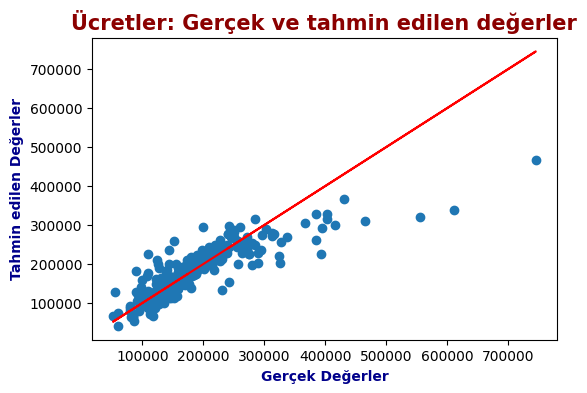

Ortalama Mutlak Hata (MAE)        : 27218.59176235772
Ortalama Kare Hata (MSE)          : [7.62525083e+09 2.76514374e+10 7.27201425e+09 8.33494661e+09
 2.10851616e+10 7.24714304e+09 1.05122379e+10 2.16676054e+10
 7.46108720e+09 1.56124297e+10 7.27449042e+09 9.01223518e+09
 1.97064780e+10 1.96539901e+10 1.10599996e+10 7.43324992e+09
 7.38208198e+09 7.59035411e+09 1.08392083e+10 7.99542128e+09
 3.07502798e+10 7.49633020e+09 7.26307123e+09 2.47238848e+10
 2.59621539e+10 2.16689486e+10 7.89770253e+09 7.31672196e+09
 7.53078070e+09 8.76455219e+10 1.20172433e+10 1.23047966e+10
 7.61158548e+09 1.32397087e+10 7.28535547e+09 1.29219609e+10
 1.27620975e+10 9.13691023e+09 1.66741756e+10 2.43699909e+10
 1.03384147e+10 8.80844219e+09 7.53751848e+09 7.49193081e+09
 1.14575903e+10 1.27693027e+10 7.67462039e+09 1.47003506e+10
 1.43188481e+10 1.37686533e+10 1.01034147e+10 8.43573557e+09
 1.48457933e+10 7.56528157e+09 7.48263201e+09 7.52880536e+09
 8.94872968e+09 2.02696352e+10 9.89728263e+09 1.45146315

In [46]:
X_test1 = sm.add_constant(X_test1)

y_preds1 = sonuclar.predict(X_test1)


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test1, y_preds1)
plt.plot(y_test1, y_test1, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Ücretler: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test1, y_preds1)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test1, y_preds1)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test1, y_preds1)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test1 - y_preds1) / y_test1)) * 100))

Sonuçlar yine matris şeklinde döndüğü için tüm metrikler için yorum yapamıyorum.

Ama ortalama mutlak hata diğer modele göre artmış görünüyor. O yüzden model performansı düşmüş gibi görünüyor. Eğer öyleyse, bu özellik setini değiştirip, modeli tekrar test ederim.

